In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv("anemia.csv")
df.head(3)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia


In [43]:
y=df["Diagnosis"]
x=df.drop(columns=["Diagnosis"])

In [44]:
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
le.inverse_transform([4])

array(['Macrocytic anemia'], dtype=object)

In [46]:
y = to_categorical(y)

In [47]:
y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [48]:
xC = len(x.columns)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=43)

In [50]:
model = Sequential()

#input layer
model.add(Dense(256,activation="relu",input_dim =xC))

#hidden layer
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))

#output layer

model.add(Dense(9,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [52]:
history = model.fit(x_train,y_train,epochs=128,batch_size=32,validation_split=0.24)

Epoch 1/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1287 - loss: 8.4518 - val_accuracy: 0.3333 - val_loss: 2.2125
Epoch 2/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3673 - loss: 1.7057 - val_accuracy: 0.3810 - val_loss: 1.7498
Epoch 3/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4161 - loss: 1.6426 - val_accuracy: 0.5584 - val_loss: 1.5323
Epoch 4/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4802 - loss: 1.4600 - val_accuracy: 0.4372 - val_loss: 1.6024
Epoch 5/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4901 - loss: 1.4725 - val_accuracy: 0.5584 - val_loss: 1.5402
Epoch 6/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5082 - loss: 1.3646 - val_accuracy: 0.3420 - val_loss: 1.7559
Epoch 7/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4652 - loss: 1.4493 - val_accuracy: 0.5887 - val_loss: 1.3321
Epoch 8/128
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5685 - loss: 1.2088 - val_accuracy: 0.5931 - 

In [53]:
df.head(3)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia


In [54]:
tahmin = np.array([[9.4,34,58,2.8,4.3,3.3,8.8,32,78,24,26,155,15,0.17]])
sonuc = model.predict(tahmin)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [55]:
le.inverse_transform([np.argmax(sonuc)])

array(['Normocytic hypochromic anemia'], dtype=object)

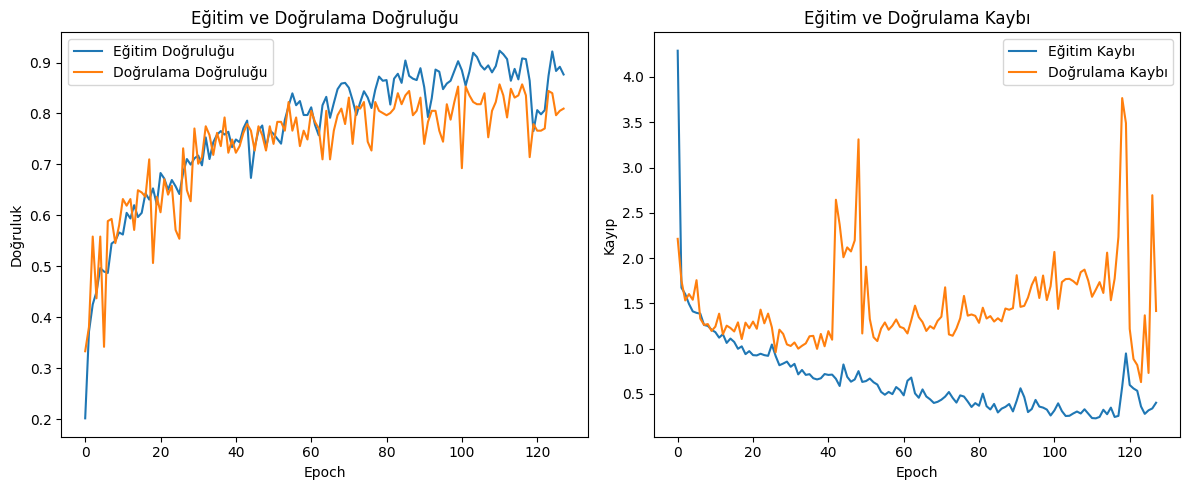

In [56]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()